In [137]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.optimize as sp
import scipy.constants as const
plt.rcParams['figure.dpi'] = 150

In [138]:
Data_names = []
for (dir_path, dir_names, file_names) in os.walk('./Labday_2_measurements_2'):
    Data_names.extend(file_names)

In [139]:
Data_list = []

for i, Data_name in enumerate(Data_names):
    Data = np.loadtxt('Labday_2_measurements_2/' + Data_name, skiprows = 3)
    Data_list.append(Data)

In [140]:
c_light = const.c
eps0 = const.epsilon_0
T = 0.5
R = 0.5
I_av = [np.mean(i) for i in Data_list]
# Guess values for function
a_guess = (1/4)*c_light*eps0*9.9**2
b_guess = (2*np.pi) #/(600e-7)


In [156]:
Time=Data[:,0]

In [142]:
Intensity = c_light*eps0*np.absolute(V1+V2)**2
Intensity

array([0.00093811, 0.00179209, 0.00129742, 0.00054783, 0.00110934,
       0.00385921, 0.00747095, 0.00876759, 0.00671113, 0.0055813 ,
       0.00762349, 0.01307093, 0.01947153, 0.01973155, 0.02023873,
       0.01972798, 0.01947329, 0.02287692, 0.03019361, 0.03959244,
       0.04591735, 0.0451464 , 0.04213303, 0.04030191, 0.04399688,
       0.05480195, 0.06818037, 0.07640896, 0.07891551, 0.07590516,
       0.07491127, 0.07392565, 0.08145165, 0.09480814, 0.10917817,
       0.12203116, 0.12585374, 0.12394064, 0.12078548, 0.11953087,
       0.12456182, 0.13559922, 0.15268548, 0.17078535, 0.18444443,
       0.19225671, 0.19462642, 0.19224557, 0.18990432, 0.18989881,
       0.1970247 , 0.21001999, 0.22770812, 0.24521915, 0.26616083,
       0.2802775 , 0.28892049])

In [160]:
#plt.figure() #plot raw data
#plt.plot(Time, (Intensity/2)/(c_light*eps0*9.9**2), '.', label = "normalized intensity")
##plt.grid()
#plt.legend()
 # Scale x-axis ticks in terms of π
#pi_ticks = np.arange(0, np.max(Data[:, 0]), np.pi)
# plt.xticks(pi_ticks, labels=[f'{tick / np.pi}$\pi$' for tick in pi_ticks])


C:\Users\hanse\AppData\Local\Temp\ipykernel_14660\1935760561.py:28: OptimizeWarning: Covariance of the parameters could not be estimated
  popt1, pcov1 = sp.curve_fit(a_fit, V2, V1, p0_1) #add them together (v1+v2) to see how the combined wave intensity is
C:\Users\hanse\AppData\Local\Temp\ipykernel_14660\1935760561.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure() #plot raw data


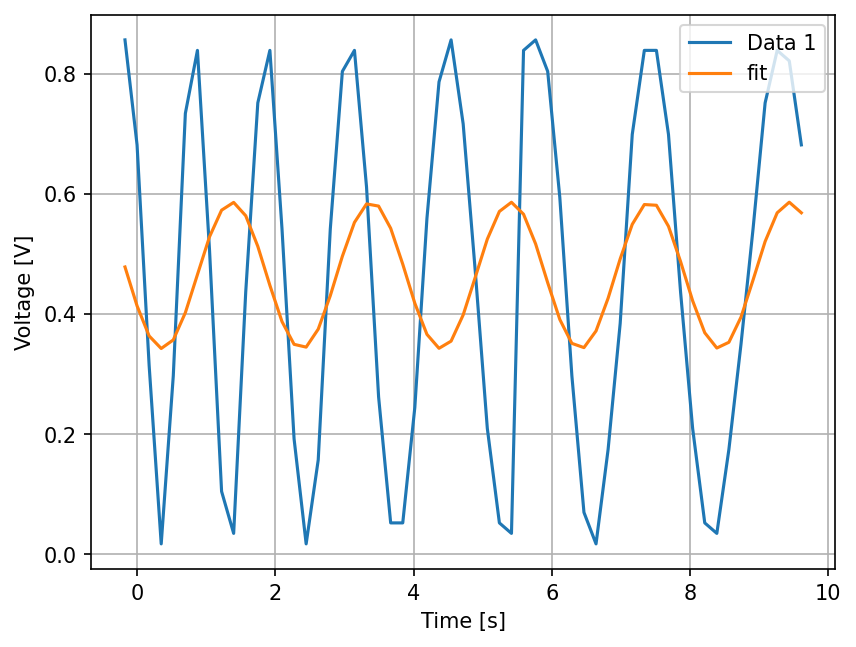

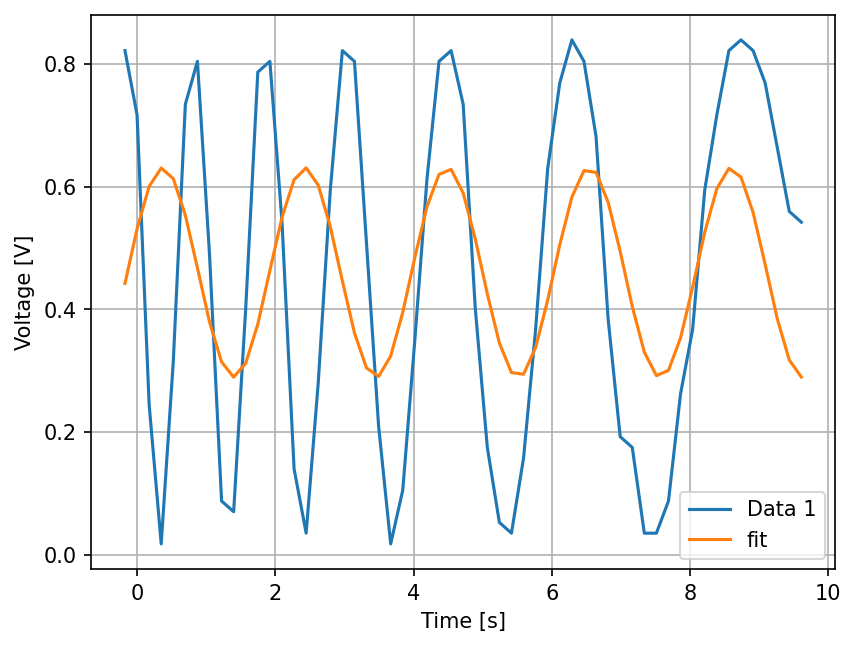

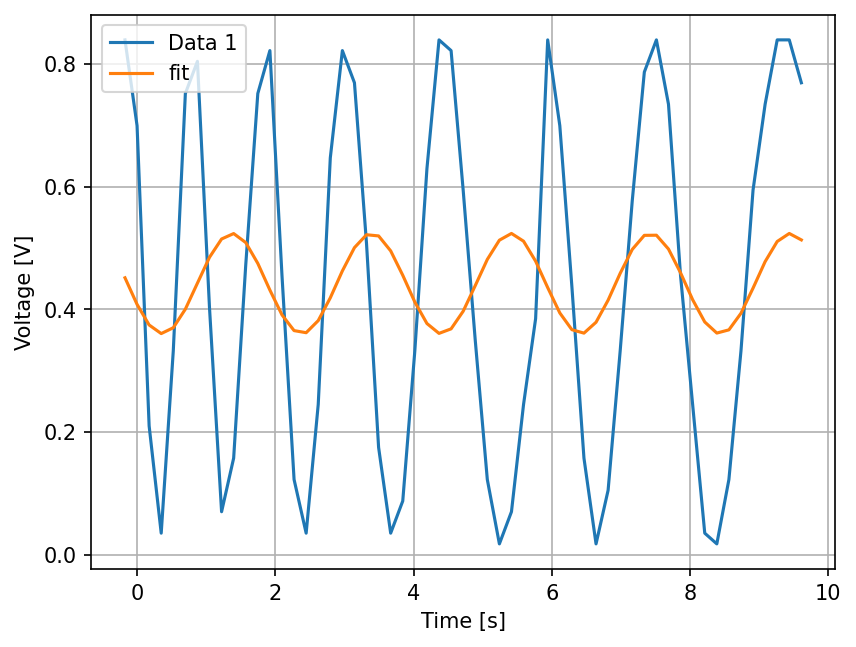

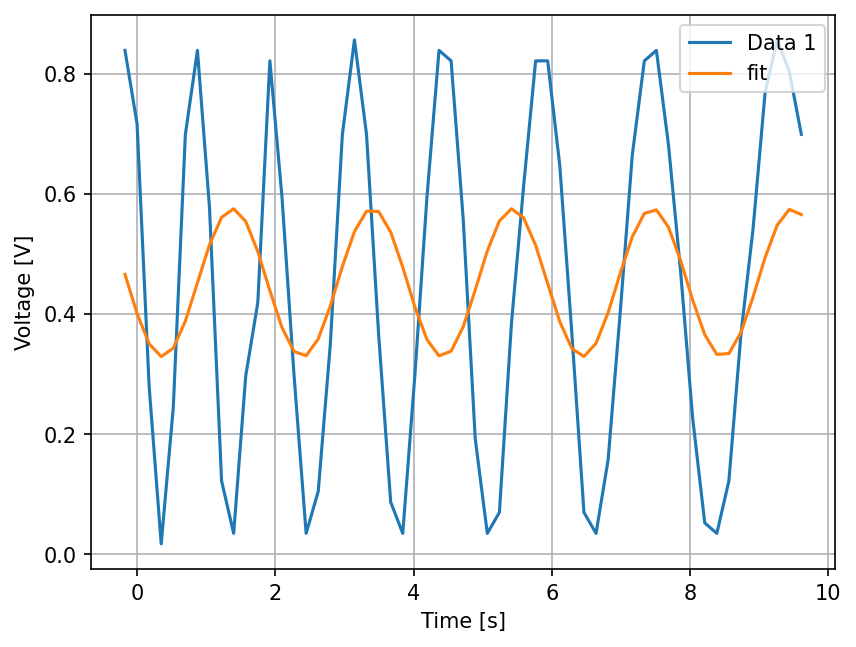

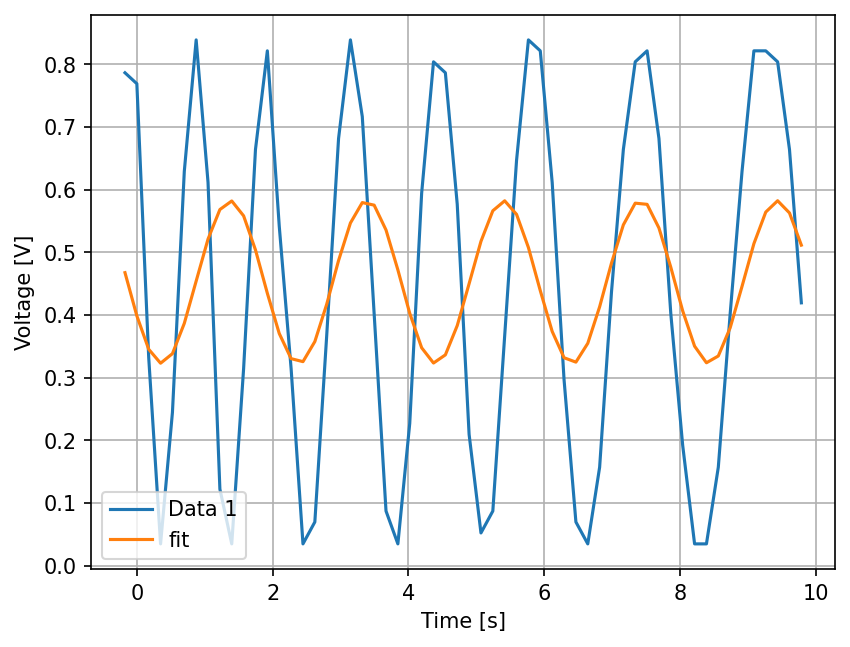

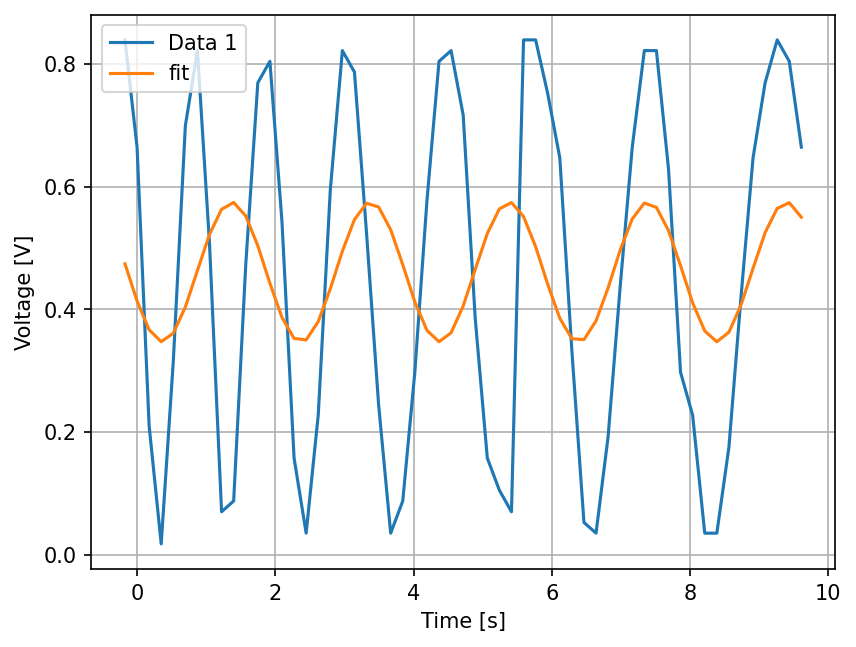

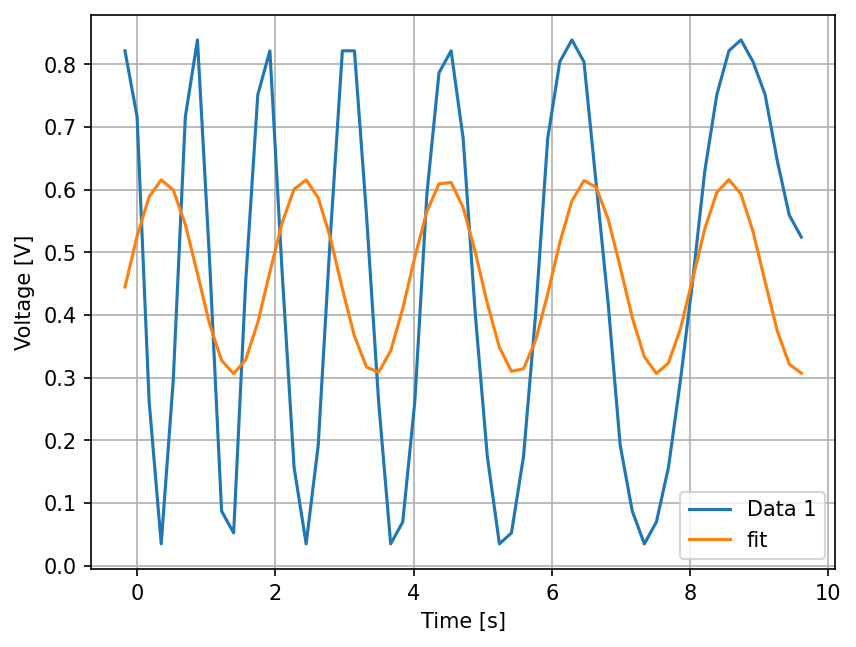

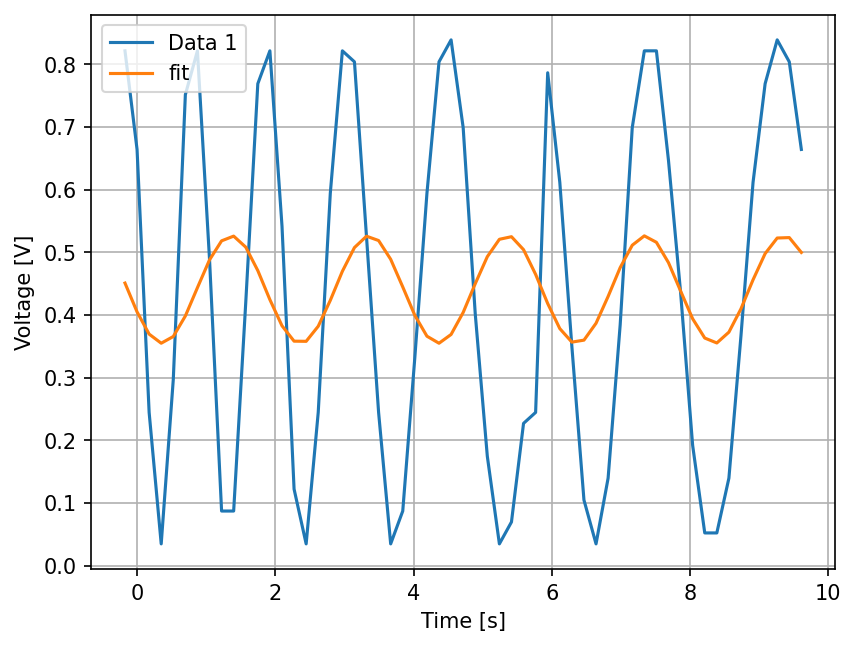

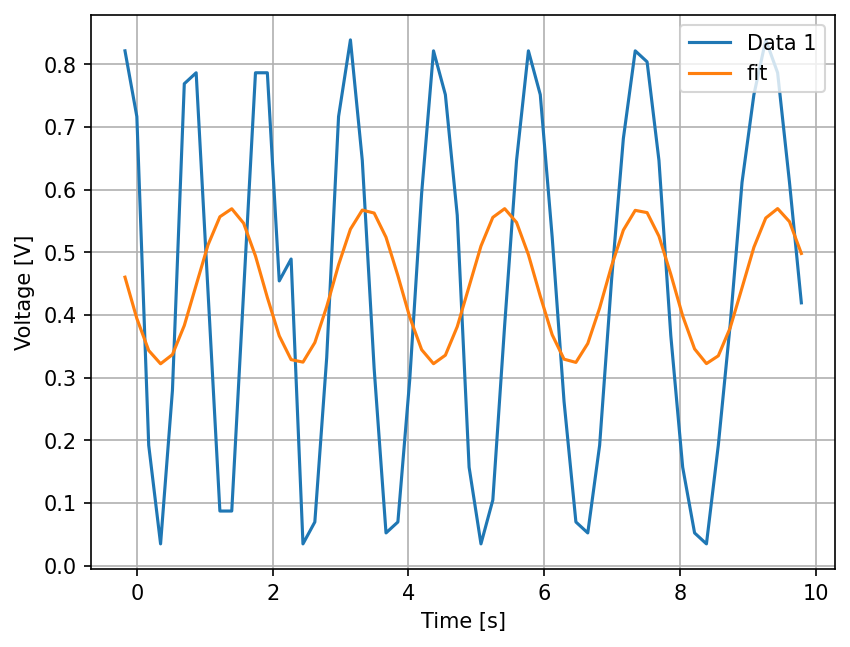

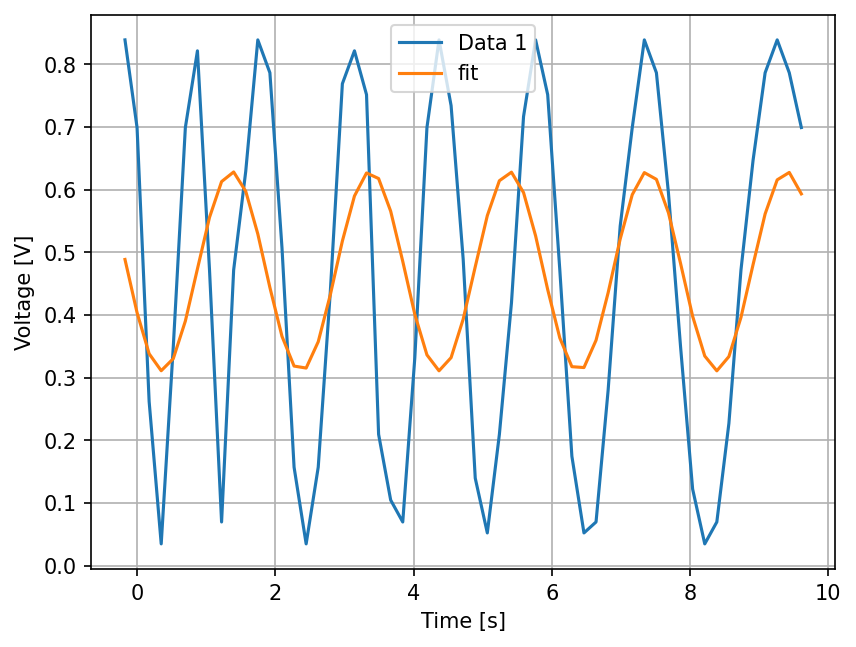

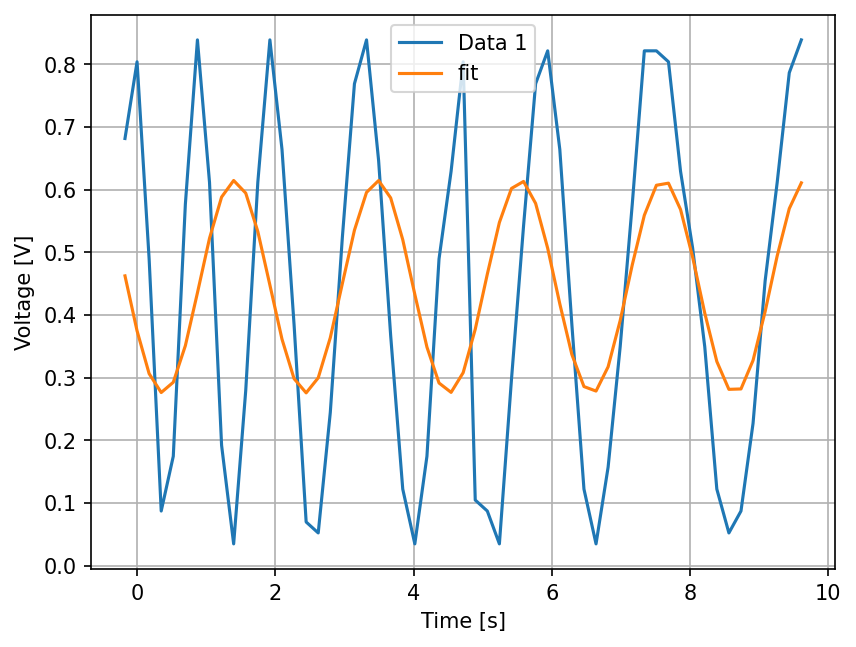

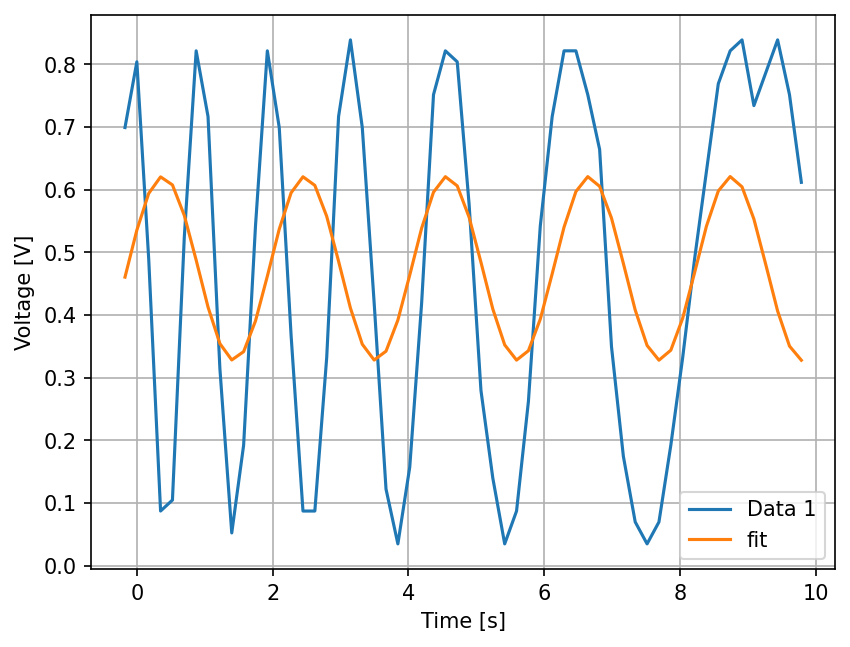

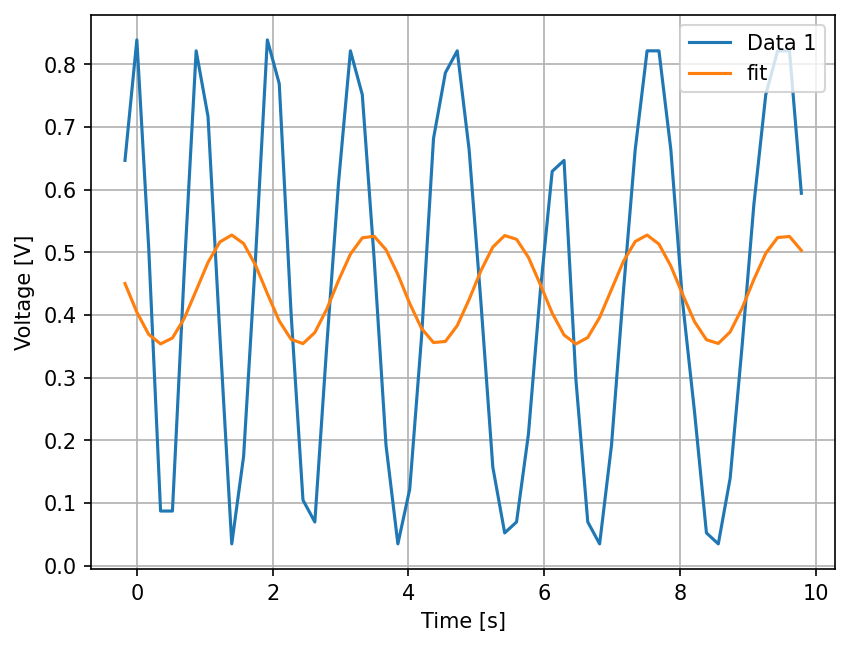

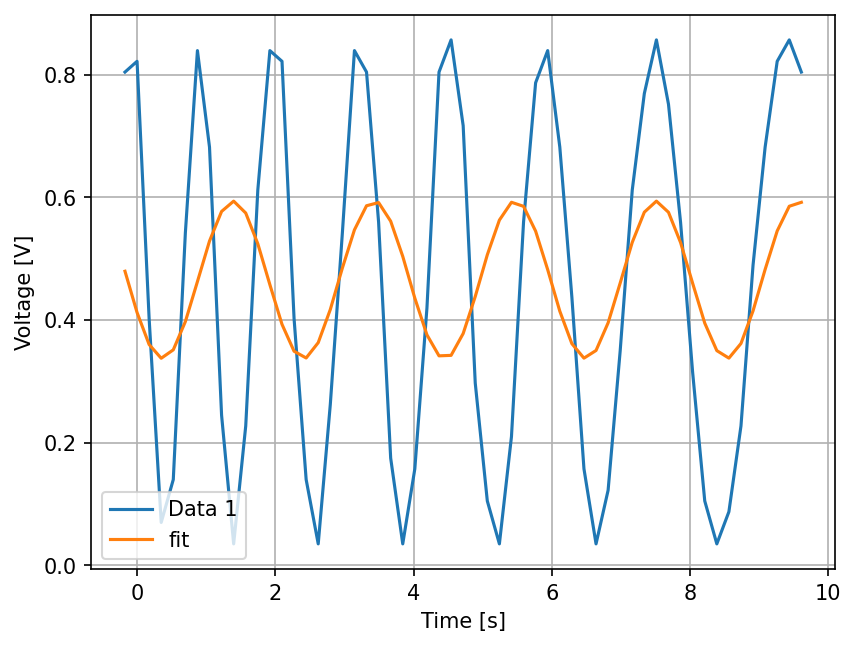

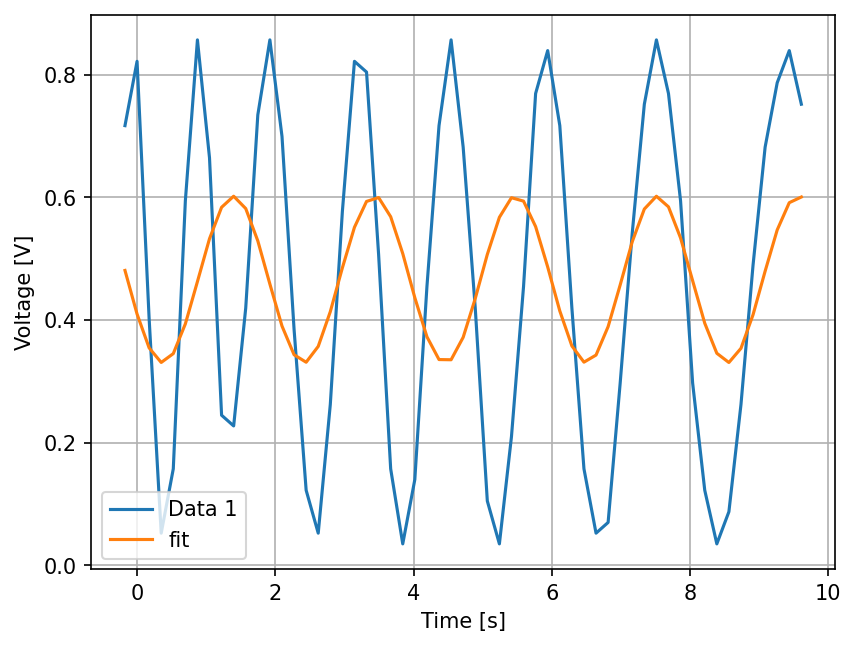

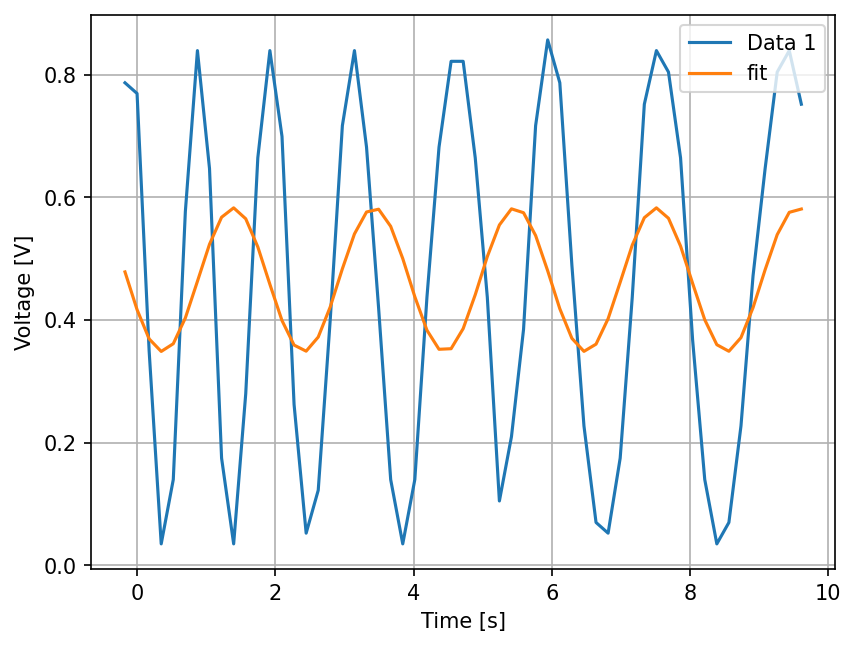

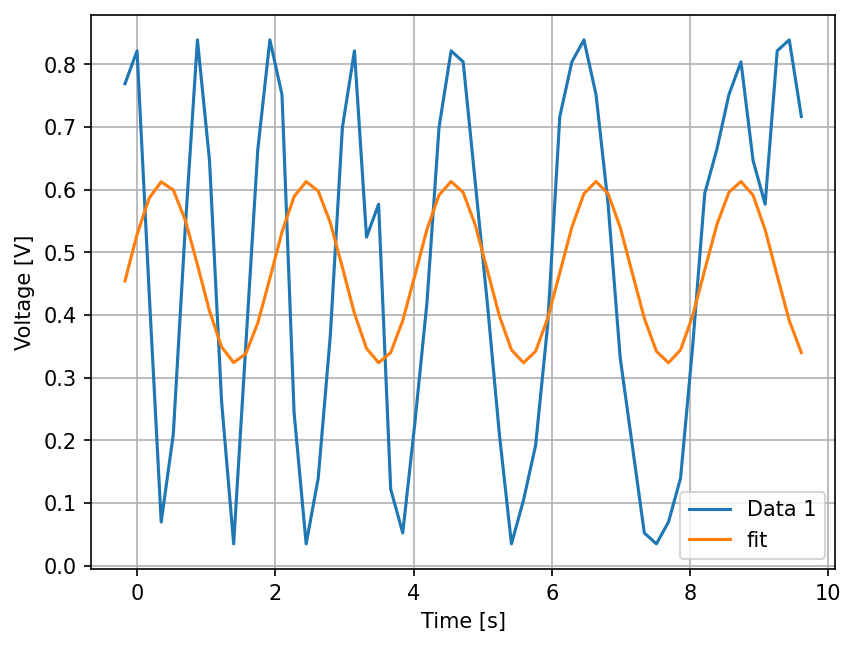

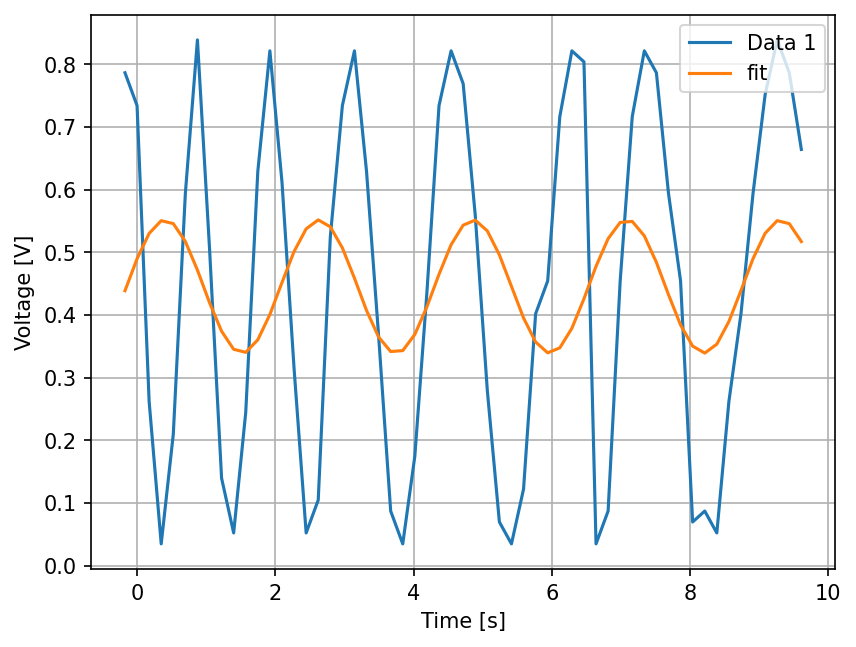

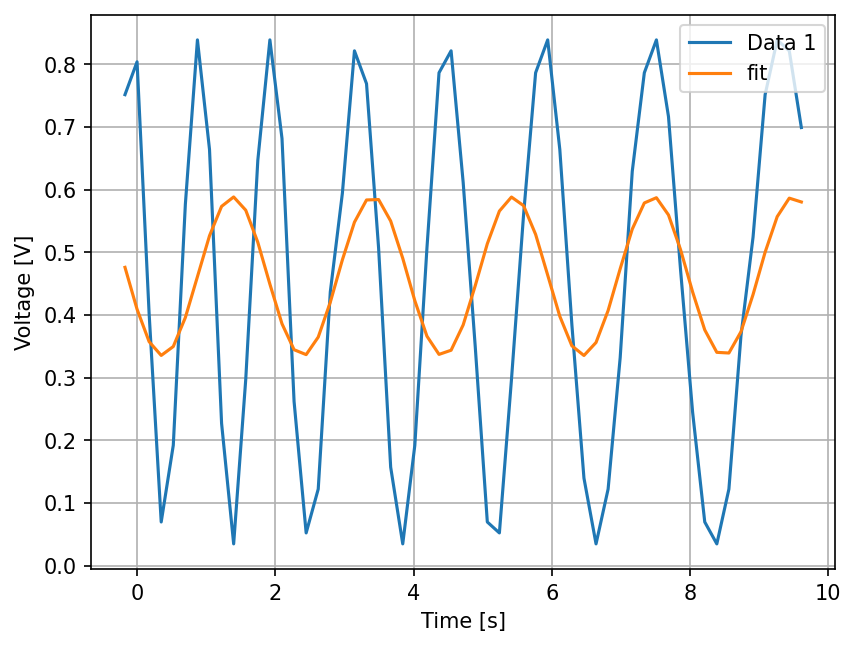

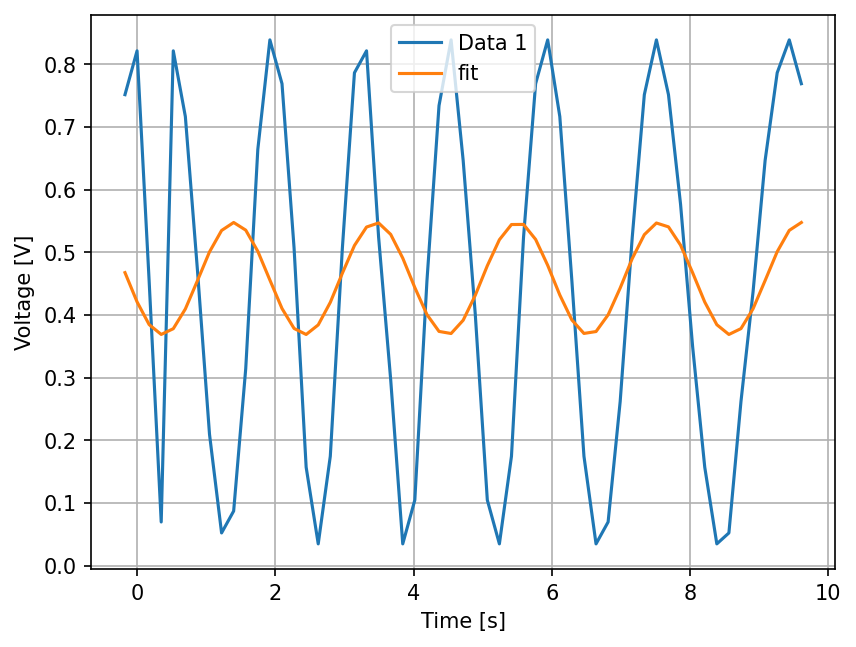

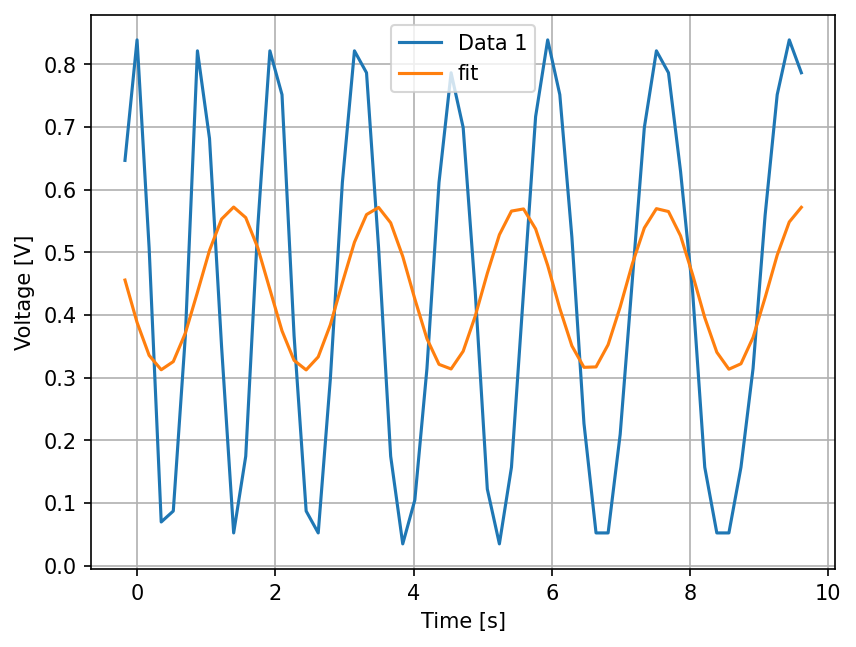

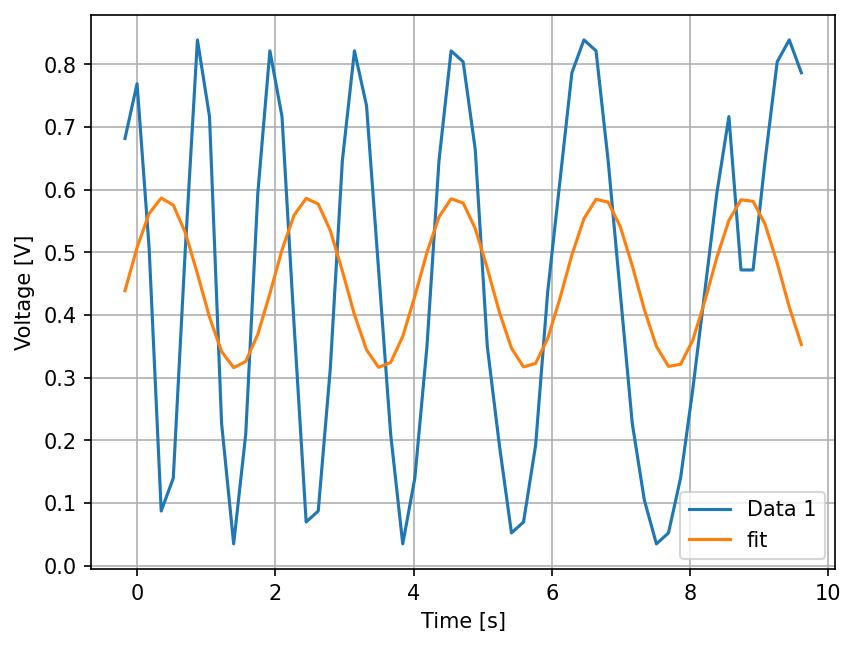

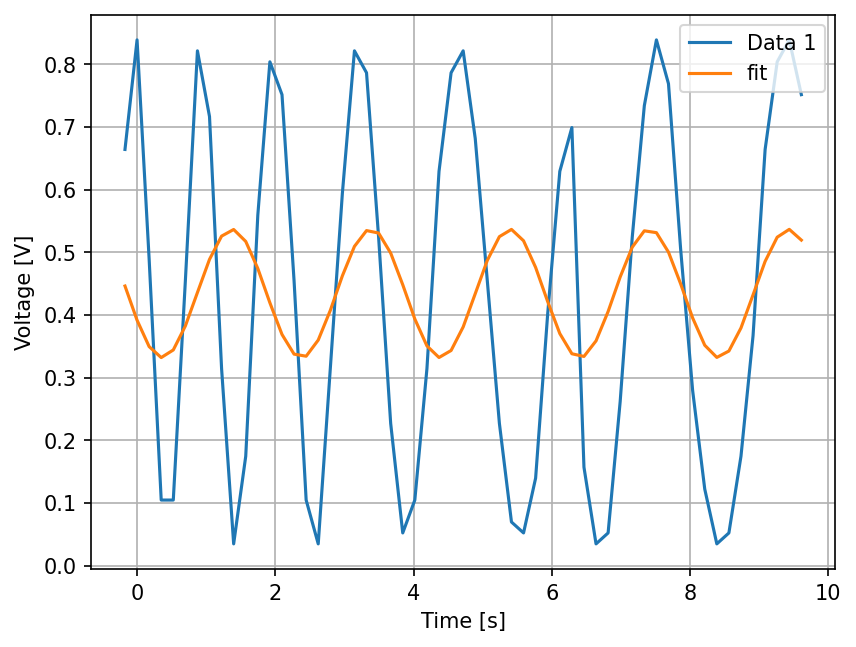

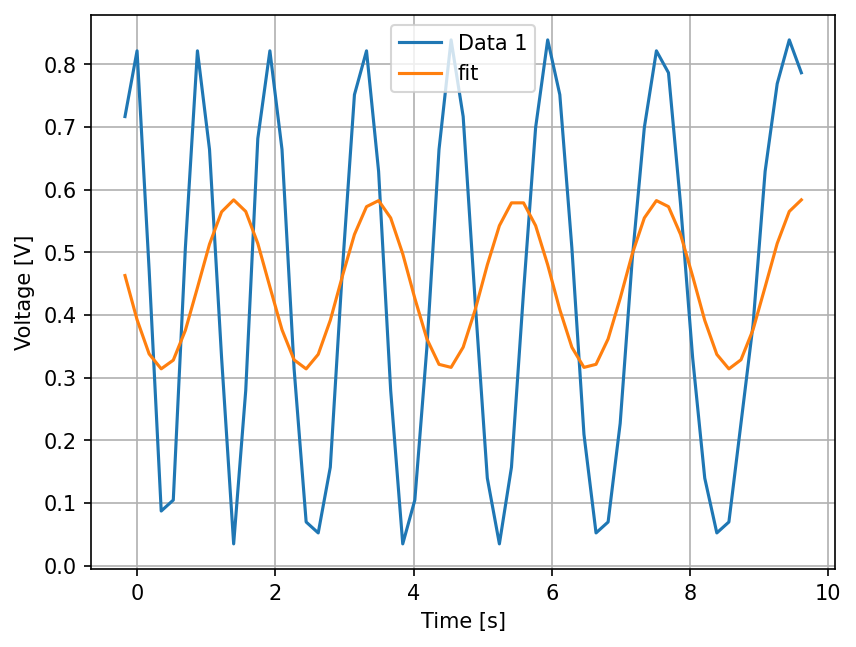

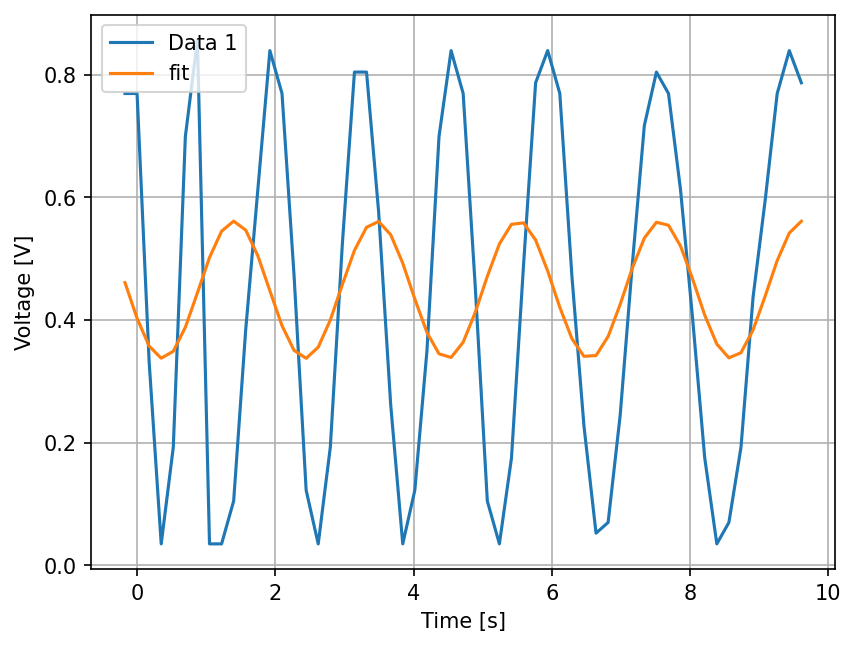

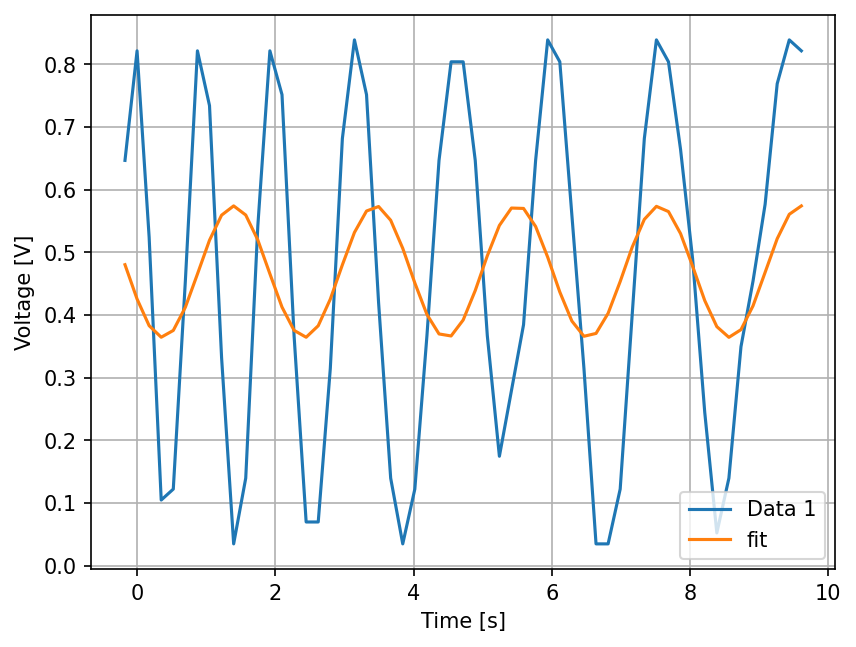

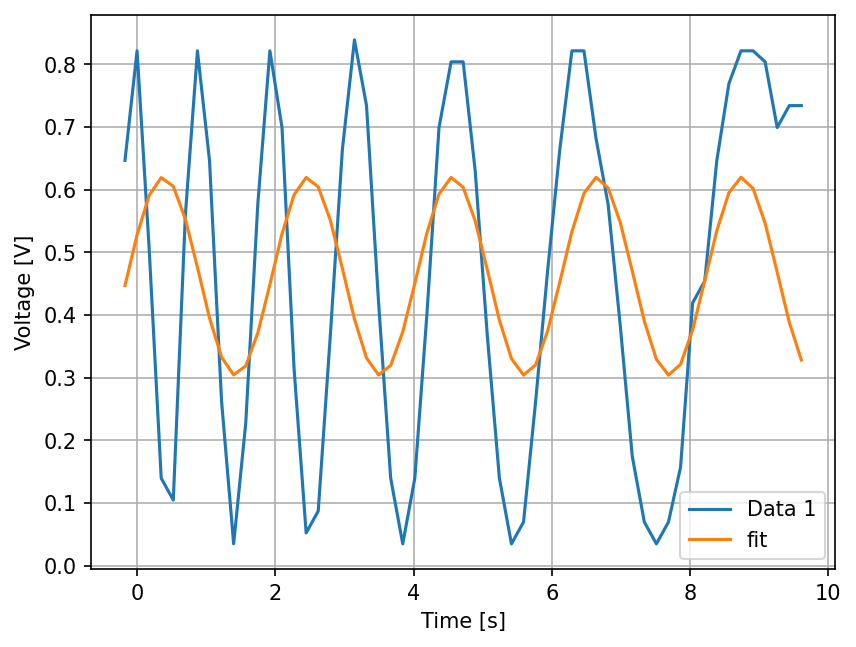

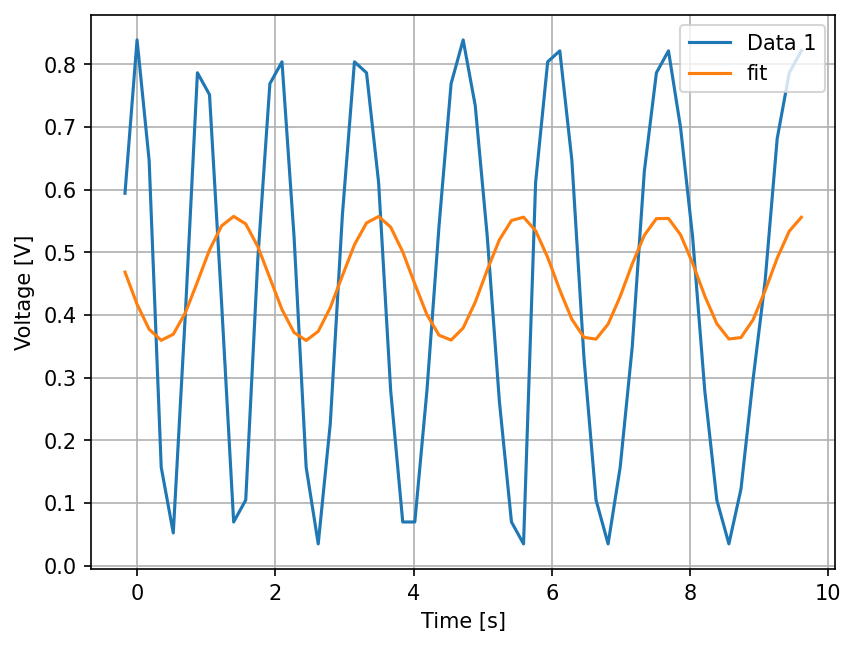

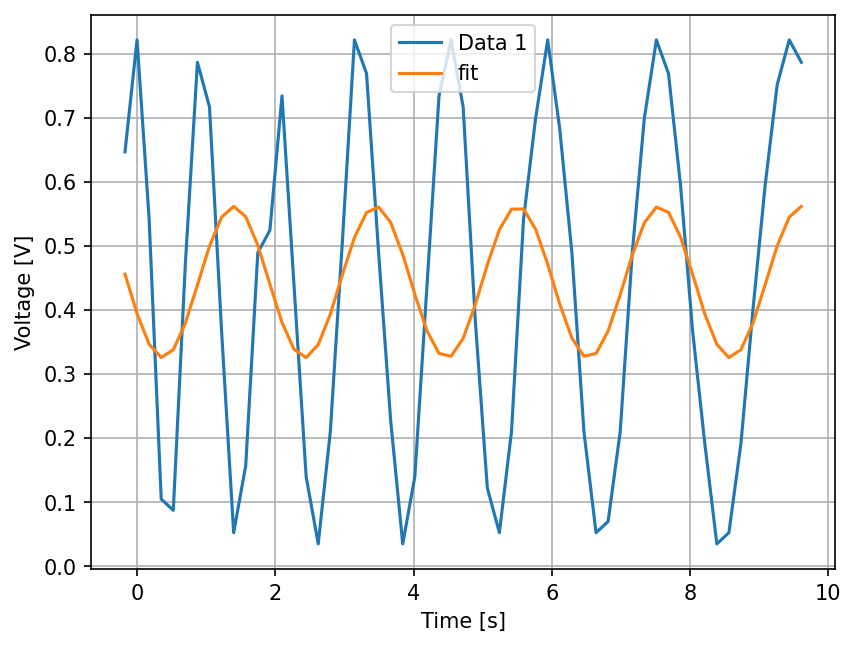

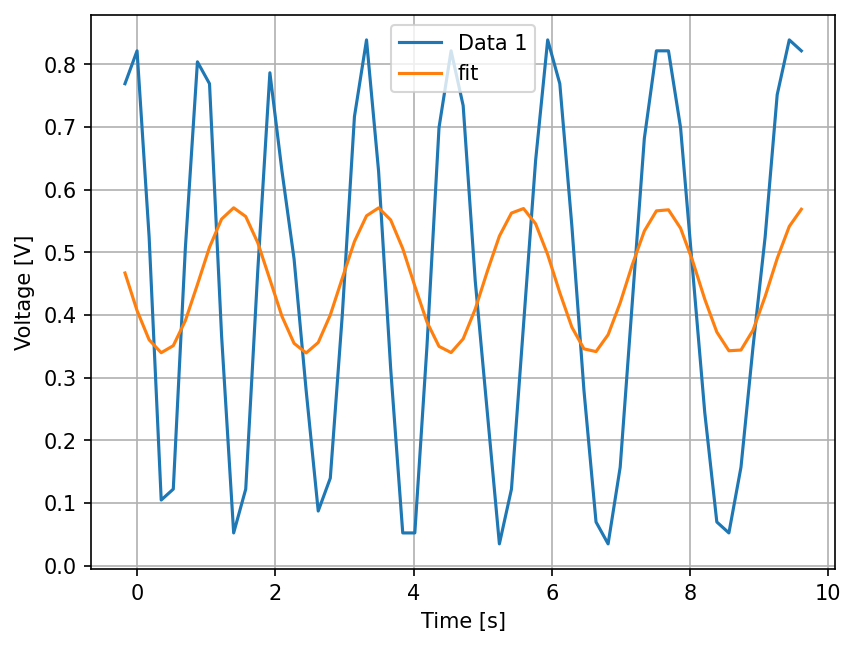

In [159]:
a_guess = 2.4
n_guess = 3
phi_guess = 0
c_guess = 0.5

p0_1= [a_guess, n_guess, phi_guess, c_guess]

def a_fit(x,*p): #define fitting function
    a=p[0]
    n=p[1]
    phi=[2]
    c = p[3]
    return a * (np.cos(n*x+phi))+c

pcov_list=[]

for Data,Data_name in zip(Data_list,Data_names):
    plt.figure() #plot raw data
    Time=Data[:,0]
    V2, V2_index = np.unique(Data[:, 2], return_index = True)
    V1 = np.array([Data[:, 1][i] for i in V2_index])
    plt.plot(V2, V1, '-', label='Data 1')
    #plt.plot(Time,V2, label='Data 2')
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    
    # If you want old code replace V2 with time, V1 with V1 + V2 and remeber to adjust V2 and V1 to the right data coloumns.
    
    #Do fit to first sine wave, make guesses on amplitide with max(V1)-min(V1), make guess based on frequency written in Data_name float(Data_name[24:27])
    popt1, pcov1 = sp.curve_fit(a_fit, V2, V1, p0_1) #add them together (v1+v2) to see how the combined wave intensity is
    #plt.plot(Time, a_fit(Time, *p0_1), '-', label= 'guess')
    plt.plot(V2, a_fit(V2, *popt1),'-',label='fit')
    plt.grid()
    plt.legend()
    pcov_list.append(pcov1)

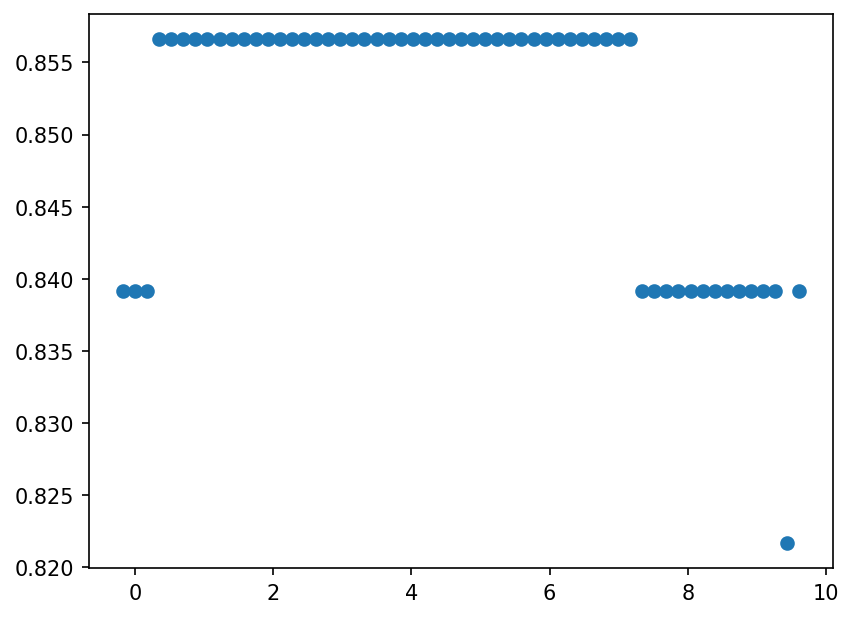

In [148]:
plt.plot(V2, V1, 'o')